# Test noise simulation methods

In [11]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys
import tensorflow as tf 
import glob
from sklearn import metrics
from sklearn.metrics import classification_report


%matplotlib inline

if os.getcwd().split('/')[-1] == "experimentation":
    %cd ../..

# Import noise simulator
from scripts.physical_transformation import get_noisy_image
from scripts.noise_simulation import NoiseConfiguration, NoiseSimulator, NoiseType
from scripts.utils import read_dcm


In [12]:
NOISE_LEVEL = 0

In [13]:
def get_data(df, noise_level):
  labels=[]
  images=[]
  images_path = "data/train/images/"
  filenames = df['filename'].tolist()
  for filename in filenames:
    image = read_dcm(images_path + filename)
    #noisy_image = get_noisy_image(image, noise_level)
    images.append(image)

  labels = df['any'].tolist()
  return images, labels

def get_train_data():
  train_df=pd.read_csv("data/train/data.csv")
  train_images, train_labels = get_data(train_df, NOISE_LEVEL)

  X_train = np.array(train_images)/255
  X_train = np.expand_dims(X_train,3)
  y_train = np.array(train_labels)
  
  return X_train, y_train


In [14]:
X_train, y_train = get_train_data()

In [15]:
y_train[0]

1

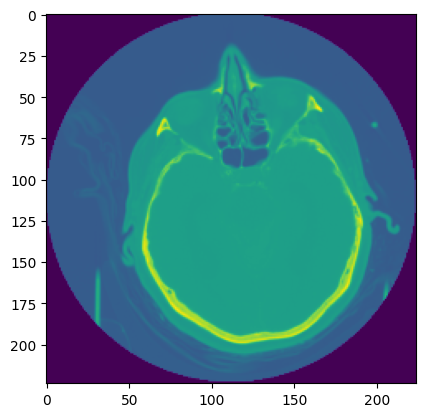

In [16]:
# Show first image
plt.imshow(X_train[0])
plt.show()

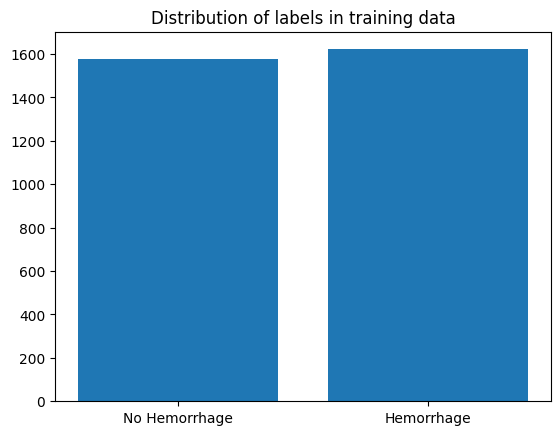

Amount of images with no hemorrhage:  1578
Amount of images with hemorrhage:  1622


In [17]:
# Plot distribution of labels 0 and 1
amt_0 = len(y_train[y_train == 0])
amt_1 = len(y_train[y_train == 1])

plt.bar([0,1], [amt_0, amt_1])
plt.xticks([0,1], ["No Hemorrhage", "Hemorrhage"])
plt.title("Distribution of labels in training data")
plt.show()

print("Amount of images with no hemorrhage: ", amt_0)
print("Amount of images with hemorrhage: ", amt_1)


any
1    1622
0    1578
Name: count, dtype: int64


,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_04b10394d.dcm,1,0,1,1,1,0
1,ID_002b17897.dcm,0,0,0,0,0,0


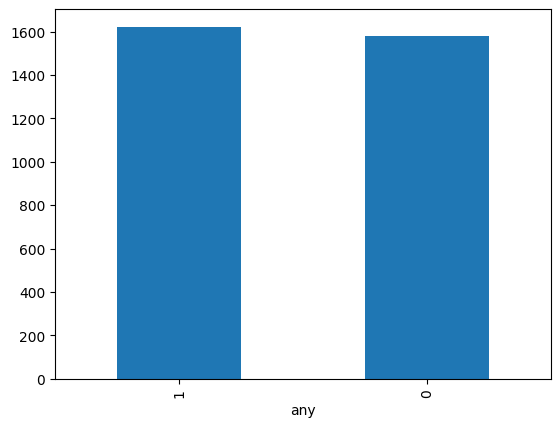

In [18]:
train_data = pd.read_csv("data/train/data.csv")

train_data['any'].value_counts().plot(kind='bar')
print(train_data['any'].value_counts())
train_data.head(2)

In [19]:
# Compare y_train with train_data['any']
print("y_train: ", y_train)
print("train_data['any']: ", train_data['any'].values)

# Check if y_train and train_data['any'] are the same
print("y_train and train_data['any'] are the same: ", np.array_equal(y_train, train_data['any'].values))

y_train:  [1 0 1 ... 0 1 1]
train_data['any']:  [1 0 1 ... 0 1 1]
y_train and train_data['any'] are the same:  True
